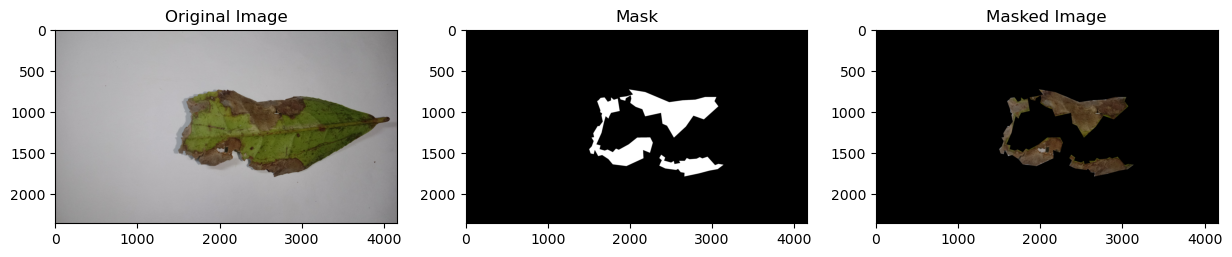

In [2]:
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt

# Load the input image
image_path = r"E:\Ragib\Noman_vai\tea_leaves\dataset\SUST\original_dataset_1\Tea Images\Brown_blight\Training_img_2.jpg"
image = cv2.imread(image_path)

# Load the JSON file containing annotations
json_path = r"E:\Ragib\Noman_vai\tea_leaves\dataset\SUST\annotated\Brown_blight\Training_img_2.1.json"
with open(json_path, 'r') as file:
    data = json.load(file)

# Create a blank mask with the same dimensions as the input image
mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Check if the key exists in the JSON and iterate through the annotations
if 'shapes' in data:
    for annotation in data['shapes']:
        points = np.array(annotation['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], color=255)
elif 'annotations' in data:
    for annotation in data['annotations']:
        points = np.array(annotation['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], color=255)
else:
    print("No valid keys ('shapes' or 'annotations') found in JSON.")

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Display the original image, mask, and masked image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Mask")
plt.imshow(mask, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Masked Image")
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))

plt.show()
